## Auto mpg dataset

This datset is collected from UCI machine learning repository(http://mlr.cs.umass.edu/ml/datasets/Auto+MPG).The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.
Here we have to evaluate the mpg values on basis of various features such as car,model,cylinders etc.

I am going to import numpy and pandas for data operations,pyplot from the subpackages of matplotlib and seaborn library for data visualization and sklearn for data process for machine learning and metrics.

In [1]:
#import required libraries and metrices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#importing warnings to suppress while raise of the error
import warnings
warnings.filterwarnings('ignore')

In [2]:
#accesing the dataset from the folder and putting to the dataframe
m=pd.read_csv('C:/Users/hp/Downloads/DSData-master/auto-mpg.csv',sep="\s+",names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model','origin','car_name'])
mpg=pd.DataFrame(m)

#get a look to the structure of data
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
#lets check the shape of the dataset
mpg.shape

(398, 9)

In [4]:
#verifying for null values in the data
mpg.isnull().sum()

#it seems there is no null values in the datset

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
car_name        0
dtype: int64

In [5]:
#car_name is not have any role in predicting the mpg values,so lets drop it
mpg.drop('car_name',axis=1,inplace=True)

In [6]:
for col in mpg.columns:
    print(mpg[col].value_counts())

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
34.2     1
38.1     1
37.2     1
32.1     1
32.7     1
Name: mpg, Length: 129, dtype: int64
4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64
97.0     21
98.0     18
350.0    18
250.0    17
318.0    17
         ..
68.0      1
155.0     1
96.0      1
97.5      1
114.0     1
Name: displacement, Length: 82, dtype: int64
150.0    22
90.00    20
88.00    19
110.0    18
100.0    17
         ..
138.0     1
61.00     1
132.0     1
137.0     1
208.0     1
Name: horsepower, Length: 94, dtype: int64
2130.0    4
1985.0    4
2265.0    3
2125.0    3
2720.0    3
         ..
2215.0    1
2585.0    1
3850.0    1
3449.0    1
3504.0    1
Name: weight, Length: 351, dtype: int64
14.5    23
15.5    21
16.0    16
14.0    16
13.5    15
        ..
17.1     1
24.6     1
23.5     1
16.1     1
15.6     1
Name: acceleration, Length: 95, dtype: int64
73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70   

In [7]:
#lets check the datatype of features
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model             int64
origin            int64
dtype: object

In [8]:
# it shows that the horsepower column is an object datatype but appears to be numeric data,so lets see the values there
mpg['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [9]:
# we can see that the odd value is '?' representing null
# so we now change it to NaN value and fill the spot with the mean horsepower

mpg['horsepower'] = mpg['horsepower'].replace('?','NaN').astype(float)

mpg['horsepower'].fillna(mpg['horsepower'].mean(),inplace=True)
mpg['horsepower']= mpg['horsepower'].astype(int)

# print the info of the data again to see the datatypes of columns
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null int32
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
dtypes: float64(4), int32(1), int64(3)
memory usage: 23.4 KB


In [10]:
#lets convert some features to labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=["cylinders","model","origin"]
for val in list:
    mpg[val]=le.fit_transform(mpg[val])

Data Visualization

mpg                AxesSubplot(0.125,0.657941;0.227941x0.222059)
cylinders       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
displacement    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
horsepower         AxesSubplot(0.125,0.391471;0.227941x0.222059)
weight          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
acceleration    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
model                 AxesSubplot(0.125,0.125;0.227941x0.222059)
origin             AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

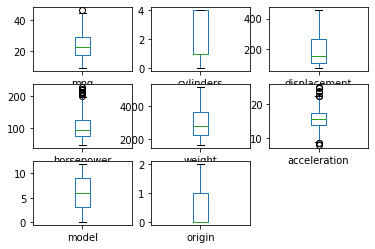

In [11]:
#plotting the boxplot for each features
mpg.plot(kind='box',subplots=True,layout=(3,3))

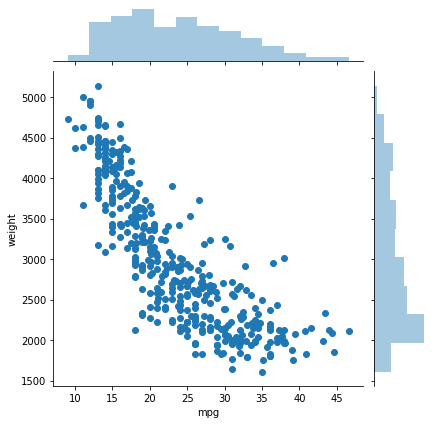

In [12]:
#plotting the jointplot on mpg wrt to weight
sns.jointplot(x="mpg",y="weight",data=mpg)

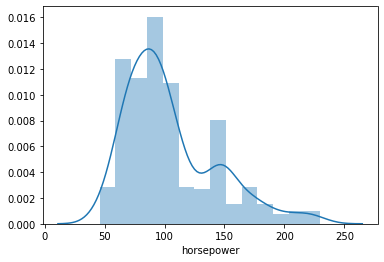

In [13]:
#plotting distplot on horsepower features
sns.distplot(mpg['horsepower'])

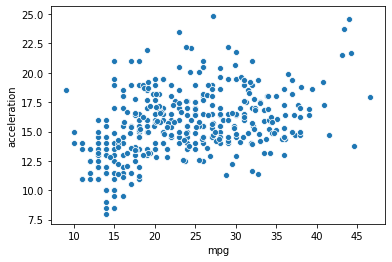

In [14]:
sns.scatterplot(x='mpg',y='acceleration',data=mpg)

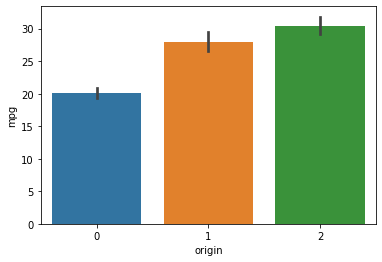

In [15]:
sns.barplot(x='origin',y='mpg',data=mpg)

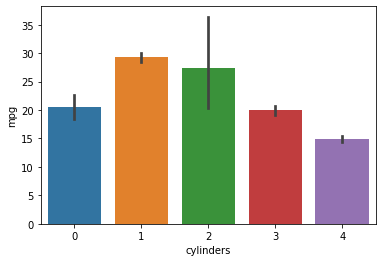

In [16]:
sns.barplot(x='cylinders',y='mpg',data=mpg)

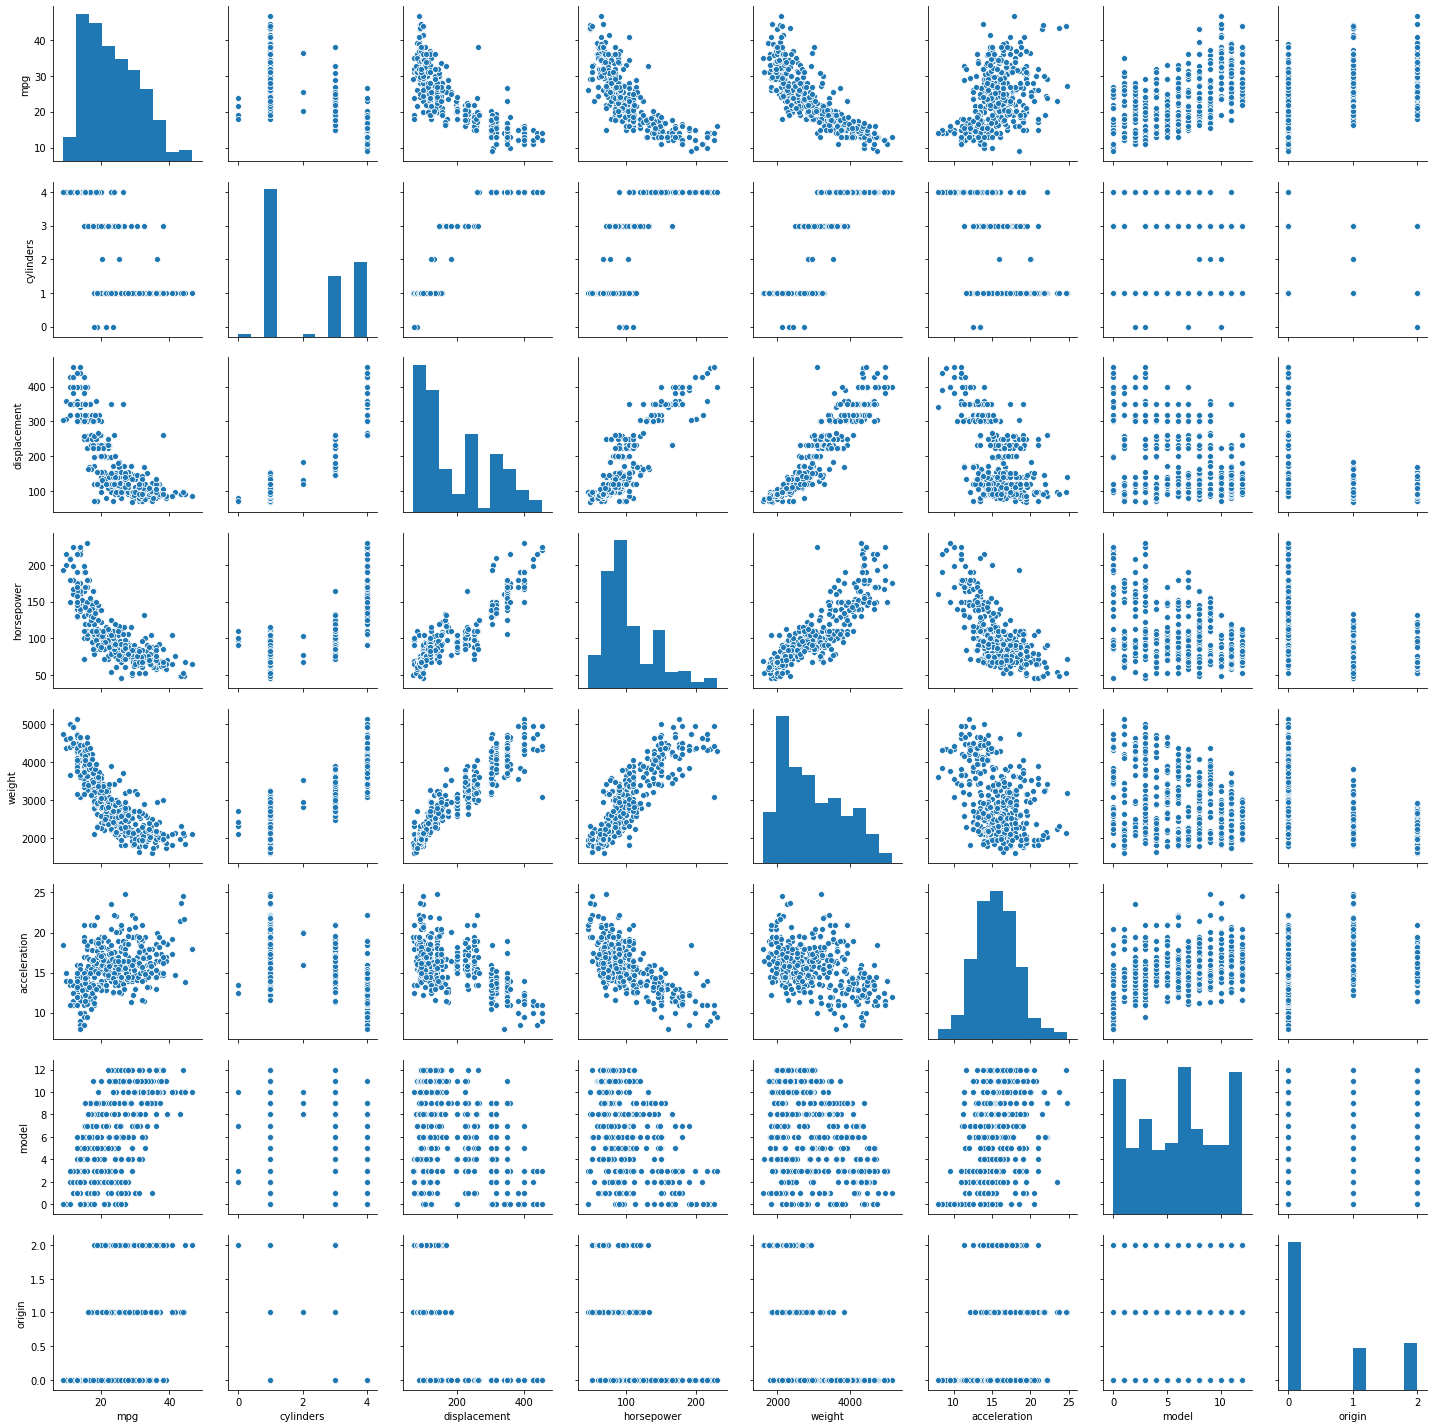

In [17]:
#pairplot among all the features of the dataset
sns.pairplot(mpg)

In [18]:
#getting the correlation of the data
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
mpg,1.000000,-0.779120,-0.804203,-0.771543,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.779120,1.000000,0.933361,0.799056,0.883339,-0.462094,-0.335232,-0.580773
displacement,-0.804203,0.933361,1.000000,0.893760,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771543,0.799056,0.893760,1.000000,0.860676,-0.684376,-0.411750,-0.453613
weight,-0.831741,0.883339,0.932824,0.860676,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.462094,-0.543684,-0.684376,-0.417457,1.000000,0.288137,0.205873
model,0.579267,-0.335232,-0.370164,-0.411750,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.580773,-0.609409,-0.453613,-0.581024,0.205873,0.180662,1.000000


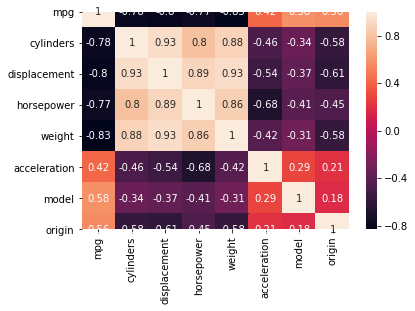

In [19]:
#plotting correlation to the heatmap
sns.heatmap(mpg.corr(),annot=True)

Statistical summary of the data

In [20]:
#describe to get statistical summary
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,2.195980,193.425879,104.462312,2970.424623,15.568090,6.010050,0.572864
std,7.815984,1.328541,104.269838,38.199230,846.841774,2.757689,3.697627,0.802055
min,9.000000,0.000000,68.000000,46.000000,1613.000000,8.000000,0.000000,0.000000
25%,17.500000,1.000000,104.250000,76.000000,2223.750000,13.825000,3.000000,0.000000
50%,23.000000,1.000000,148.500000,95.000000,2803.500000,15.500000,6.000000,0.000000
75%,29.000000,4.000000,262.000000,125.000000,3608.000000,17.175000,9.000000,1.000000
max,46.600000,4.000000,455.000000,230.000000,5140.000000,24.800000,12.000000,2.000000


There is the presence of outliers in the data affecting mean and min-max values.

We need to minimise the outliers from the data,so lets import zscore

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(mpg))
mpg_new=mpg[(z<3).all(axis=1)]
mpg_new.shape

(391, 8)

In [22]:
#taking modified datset as the final dataset
mpg=mpg_new

In [23]:
#importing boxcox to handle huge outliers in some column
from scipy.stats import boxcox
l=['displacement','horsepower','weight']
for i in l:
    mpg[i]=boxcox(mpg[i],0)

In [24]:
#checking for the skewed values
mpg.skew()

mpg             0.433170
cylinders       0.296528
displacement    0.221355
horsepower      0.304588
weight          0.165729
acceleration    0.217097
model           0.004518
origin          0.911256
dtype: float64

In [25]:
#we have skewed data above 0.55,so lets manage it
mpg['origin']=np.sqrt(mpg['origin'])

Shaping the data for modelling

In [26]:
x=mpg.iloc[:,1:]
y=mpg.iloc[:,0]

In [27]:
#creating function for determining random state
def random(alg):
    r_state=0
    for r_score in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        r2scr=r2_score(y_test,pred)
        if r2scr > r_state:
            r_state=r2scr
            final_r=r_score
    print(r2scr,'at',final_r)

In [28]:
#creating the function for algorithm operations
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    print('mean_squared_error=',mean_squared_error(y_test,pred))
    print('mean_absolute_error=',mean_absolute_error(y_test,pred))
    print('r2_score=',r2_score(y_test,pred))
    print('root_mean_squared_error=',np.sqrt(mean_squared_error(y_test,pred)))

In [29]:
#creating function to evaluate cross_val_score
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5,scoring='r2')
    print(score)
    print('mean_cross_val_score=',score.mean())
    print('standard_deviation cross_val_score=',score.std())

Lets start to apply algorithms one by one to the input to get output prediction

Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
random(lm)

0.8161194353673868 at 85


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)
model(lm)

mean_squared_error= 8.306432979336428
mean_absolute_error= 2.184919086427508
r2_score= 0.8698220816123543
root_mean_squared_error= 2.882088301793758


In [32]:
cross_val(lm)

[0.55331981 0.76559821 0.84907545 0.75746798 0.25838322]
mean_cross_val_score= 0.6367689346869243
standard_deviation cross_val_score= 0.21278101566600444


Decision tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
random(dtr)

0.7737292105984441 at 92


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=92)
model(dtr)

mean_squared_error= 8.081692307692311
mean_absolute_error= 2.1153846153846154
r2_score= 0.8605273737262584
root_mean_squared_error= 2.842831741009712


In [35]:
cross_val(dtr)

[0.72793667 0.72674767 0.70637514 0.52157259 0.17239962]
mean_cross_val_score= 0.5710063376630586
standard_deviation cross_val_score= 0.21379345732891858


K-neighbors

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knr,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 8}

In [37]:
knr=KNeighborsRegressor(n_neighbors=8)
random(knr)

0.7326569315485265 at 57


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=57)
model(knr)

mean_squared_error= 9.602787259615386
mean_absolute_error= 2.265288461538462
r2_score= 0.8364764759596433
root_mean_squared_error= 3.098836436408896


In [39]:
cross_val(knr)

[0.7233374  0.73128325 0.73059653 0.54078473 0.09666551]
mean_cross_val_score= 0.5645334858111478
standard_deviation cross_val_score= 0.2449757323775267


Support Vector Machine

In [40]:
from sklearn.svm import SVR
svm=SVR()
parameters={'kernel':['rbf','linear'],'C':[1,10,100]}
grid=GridSearchCV(svm,parameters,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 100, 'kernel': 'linear'}

In [41]:
svm=SVR(kernel='linear')
random(svm)

0.8546152321033641 at 94


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=94)
model(svm)

mean_squared_error= 8.193478578161463
mean_absolute_error= 2.001418566151613
r2_score= 0.8629816257446187
root_mean_squared_error= 2.862425296520673


In [43]:
cross_val(svm)

[0.70979109 0.80417771 0.84386813 0.73109848 0.09627775]
mean_cross_val_score= 0.6370426326272103
standard_deviation cross_val_score= 0.27469125400585753


Ensemble techniques

Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
parameters={'n_estimators':[10,100,500]}
grd=GridSearchCV(rfr,parameters,cv=5)
grd.fit(x,y)
grd.best_params_

{'n_estimators': 500}

In [45]:
rfr=RandomForestRegressor(n_estimators=500)
random(rfr)

0.8621463810054575 at 94


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=94)
model(rfr)

mean_squared_error= 5.079698798769239
mean_absolute_error= 1.6938215384615418
r2_score= 0.9150529211158867
root_mean_squared_error= 2.25381871470827


In [47]:
cross_val(rfr)

[0.89497117 0.8277043  0.87931721 0.76575251 0.36188891]
mean_cross_val_score= 0.745926821154827
standard_deviation cross_val_score= 0.1972678096798376


Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
grid=GridSearchCV(gbr,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [49]:
gbr=GradientBoostingRegressor(n_estimators=100)
random(gbr)

0.8534334175125022 at 57


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=57)
model(gbr)

mean_squared_error= 5.811502716355897
mean_absolute_error= 1.8091679766232482
r2_score= 0.9010373365090372
root_mean_squared_error= 2.410705854382881


In [51]:
cross_val(gbr)

[0.88963859 0.85721533 0.86345957 0.81685805 0.4421209 ]
mean_cross_val_score= 0.7738584867361941
standard_deviation cross_val_score= 0.16749957709065916


After solving all the algorithm above,I get the best score of 0.86 at the random_state of 94 from random Forest Regressor.
So taking random forest as a final algorithm for this dataset,lets solve it one more time

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=94)
model(rfr)

mean_squared_error= 4.994368309538464
mean_absolute_error= 1.6784400000000006
r2_score= 0.9164798907231522
root_mean_squared_error= 2.234808338434968


In [53]:
cross_val(rfr)

[0.89276885 0.82914962 0.88147596 0.76364916 0.35655964]
mean_cross_val_score= 0.7447206449214127
standard_deviation cross_val_score= 0.19938695493055567


In [54]:
#saving the model
from sklearn.externals import joblib
joblib.dump(rfr,'rfr_autompg.pkl')

['rfr_autompg.pkl']

## Conclusion

After importing the dataset,I check for the null values first.On verifying the datatype of the features,I get the datatype "object" of the column horsepower whose data seems to be numeric.So I check that and handle the '?' character present there using replace function with mean.I analyse the data using various plots and correlation among the features.
to get the statistical summary,I used describe function that shows the presence of outliers.I have used zscore and boxcox to handle those outliers and manage the skewed values.

After this data processing and visualizing,I shape the data for machine learning and starts applying regression algorithm(as the target is continuous) one by one to the data.Random Forest Regressor emerged as the best fit model for this dataset.